In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
import statistics 

In [2]:
module_roi = "../../05_30_2020/ROI/roi_measures_Module_ALL.csv"
line_roi = "../../05_30_2020/ROI/roi_measures_Line_ALL.csv"

df_module = pd.read_csv(module_roi)
df_line = pd.read_csv(line_roi)

df = df_module.join(df_line.set_index(c.PROJECT), on=c.PROJECT, rsuffix='_LINE')
variance_df = df[["Annualized_ROI", "Annualized_ROI_LINE"]]
variance_df.head(25)

,Annualized_ROI,Annualized_ROI_LINE
0,1.236,-0.63
1,2.022,7.90
2,0.124,-0.51
3,-0.624,-0.52
4,0.149,0.17
5,-0.312,-0.38
6,2.353,1.51
7,0.309,-0.12
8,-0.490,-0.62
9,0.788,0.11


In [3]:
variance_df["ROI_VARIANCE"] = variance_df.var(axis=1)
variance_df.head()

,Annualized_ROI,Annualized_ROI_LINE,ROI_VARIANCE
0,1.236,-0.63,1.740978
1,2.022,7.90,17.275442
2,0.124,-0.51,0.200978
3,-0.624,-0.52,0.005408
4,0.149,0.17,0.000221


In [4]:
df["ROI_VARIANCE"] = variance_df["ROI_VARIANCE"]

In [5]:
greater_than_4 = df[df["ROI_VARIANCE"] > .04].sort_values(by="Project")
print(len(greater_than_4))

34


In [6]:
greater_than_4["Project"].head(34)

61            AutoMapper
17                  brew
22         cf-deployment
19                cinder
10                   cli
24                    d3
52                   dat
31                devise
21         elasticsearch
53                   fpm
45    generator-jhipster
7               gitlabhq
6         home-assistant
35                  jest
49                 jsdom
29           json-server
48                 karma
46              keystone
18            kubernetes
63                 linux
14                  lock
54             middleman
39              mongoose
1                neutron
26             office-js
16                 react
28              requests
9                 roslyn
23             socket.io
41            swagger-ui
50              systemjs
0             tensorflow
33              video.js
2                    vue
Name: Project, dtype: object

In [7]:
less_than_equal_to_4 = df[df["ROI_VARIANCE"] <= .04].sort_values(by="Project")
print(len(less_than_equal_to_4))

30


In [8]:
less_than_equal_to_4["Project"].head(30)

34              Odin
4            angular
13        angular.js
11           ansible
44      browser-sync
58           core-js
56           fluentd
25            jekyll
32            lodash
59            mathjs
40     medium-editor
15             mesos
3               moby
62           natural
55    ng-file-upload
51        nightwatch
20           nixpkgs
5               node
12              nova
42               npm
8            orleans
38            pandoc
30               pm2
60            pomelo
43          selenium
47            stylus
37        superagent
57              vega
27           webpack
36        webtorrent
Name: Project, dtype: object

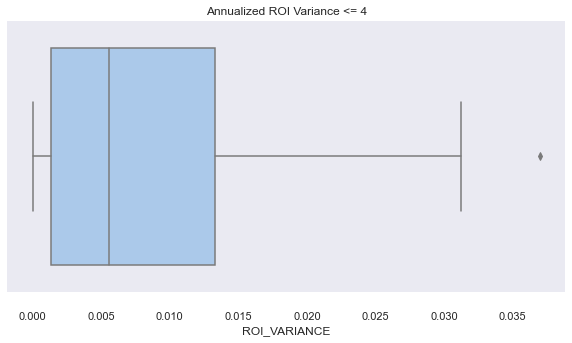

In [9]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ROI_VARIANCE", data=less_than_equal_to_4)
ax.set_title('Annualized ROI Variance <= 4')
sb.despine(offset=10, trim=True)
plt.show()

In [10]:
print("Annualized ROI Variance <= 4 Mean: {0}".format(less_than_equal_to_4["ROI_VARIANCE"].mean()))
print("Annualized ROI Variance <= 4 Min: {0}".format(less_than_equal_to_4["ROI_VARIANCE"].min()))
print("Annualized ROI Variance <= 4 Max: {0}".format(less_than_equal_to_4["ROI_VARIANCE"].max()))

Annualized ROI Variance <= 4 Mean: 0.009090216666666666
Annualized ROI Variance <= 4 Min: 0.0
Annualized ROI Variance <= 4 Max: 0.036992


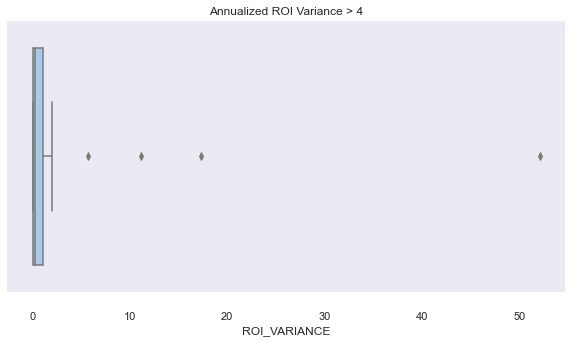

In [11]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ROI_VARIANCE", data=greater_than_4)
ax.set_title('Annualized ROI Variance > 4')
sb.despine(offset=10, trim=True)
plt.show()

In [12]:
print("Annualized ROI Variance > 4 Mean: {0}".format(greater_than_4["ROI_VARIANCE"].mean()))
print("Annualized ROI Variance > 4 Min: {0}".format(greater_than_4["ROI_VARIANCE"].min()))
print("Annualized ROI Variance > 4 Max: {0}".format(greater_than_4["ROI_VARIANCE"].max()))

Annualized ROI Variance > 4 Mean: 2.984283735294118
Annualized ROI Variance > 4 Min: 0.04292449999999998
Annualized ROI Variance > 4 Max: 52.05060449999999


In [13]:
greater_than_4_no_outliers = df[df["ROI_VARIANCE"] > 4]
greater_than_4_no_outliers.head()

,Project,Model,Amount_Invested,Amount_Returned,Investment_Gain,ROI,Annualized_ROI,Model_LINE,Amount_Invested_LINE,Amount_Returned_LINE,Investment_Gain_LINE,ROI_LINE,Annualized_ROI_LINE,ROI_VARIANCE
1,neutron,Module,4571.00,126099.60,121528.60,26.587,2.022,Line,4879.00,3437467.89,3432588.89,703.54,7.90,17.275442
33,video.js,Module,1672.96,344185.40,342512.44,204.734,4.903,Line,152876.39,2424185.40,2271309.01,14.86,1.51,5.756225
41,swagger-ui,Module,1420.95,24322.59,22901.64,16.117,1.577,Line,10699.32,22329572.54,22318873.22,2086.01,11.78,52.050604
52,dat,Module,868.66,152131.95,151263.29,174.134,4.595,Line,5502.91,6070256.76,6064753.85,1102.10,9.33,11.210113


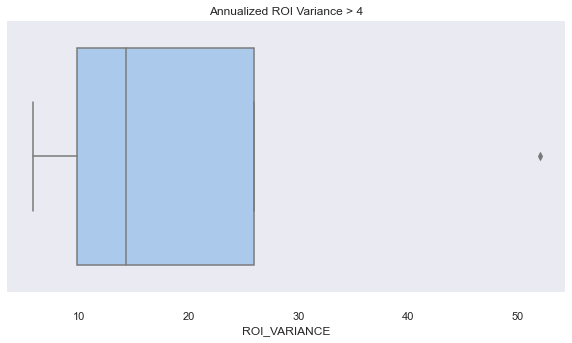

In [14]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ROI_VARIANCE", data=greater_than_4_no_outliers)
ax.set_title('Annualized ROI Variance > 4')
sb.despine(offset=10, trim=True)
plt.show()

In [15]:
print("Annualized ROI Variance > 4 Mean: {0}".format(greater_than_4_no_outliers["ROI_VARIANCE"].mean()))
print("Annualized ROI Variance > 4 Min: {0}".format(greater_than_4_no_outliers["ROI_VARIANCE"].min()))
print("Annualized ROI Variance > 4 Max: {0}".format(greater_than_4_no_outliers["ROI_VARIANCE"].max()))

Annualized ROI Variance > 4 Mean: 21.573095875
Annualized ROI Variance > 4 Min: 5.756224500000002
Annualized ROI Variance > 4 Max: 52.05060449999999
